In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
from scipy import stats


from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor 
import statsmodels.api as sm
from IPython import get_ipython
  
from matplotlib.pylab import plt #load plot library
# indicate the output of plotting function is printed to the notebook
get_ipython().run_line_magic('matplotlib', 'inline')


In [5]:
data = pd.read_csv('C:/Users/dgarg/Desktop/aging/PipeDataset.csv')
data.head()

,PipeAge,PipeDiameter,PipeLength,PipeBreakage,PipeWallLos,ExpectedPipeAge,Material_CI,Material_Concrete,Material_Ductile Iron,Material_PVC,Material_Polyethene,Material_Steel,PipeRUL
0,151,1682,4880.722405,928.382088,35,49,1,0,0,0,0,0,43
1,80,3865,1940.107485,98.755500,41,120,1,0,0,0,0,0,24
2,74,1659,2599.669467,751.541033,27,126,1,0,0,0,0,0,15
3,132,3196,1468.885640,570.858471,13,68,0,1,0,0,0,0,23
4,125,2374,746.420442,1066.889783,5,75,0,0,1,0,0,0,2


In [6]:
data.iloc[0]

PipeAge                   151.000000
PipeDiameter             1682.000000
PipeLength               4880.722405
PipeBreakage              928.382088
PipeWallLos                35.000000
ExpectedPipeAge            49.000000
Material_CI                 1.000000
Material_Concrete           0.000000
Material_Ductile Iron       0.000000
Material_PVC                0.000000
Material_Polyethene         0.000000
Material_Steel              0.000000
PipeRUL                    43.000000
Name: 0, dtype: float64

In [7]:
print(data.shape)
data.head(2)
data.dtypes



(10000, 13)


PipeAge                    int64
PipeDiameter               int64
PipeLength               float64
PipeBreakage             float64
PipeWallLos                int64
ExpectedPipeAge            int64
Material_CI                int64
Material_Concrete          int64
Material_Ductile Iron      int64
Material_PVC               int64
Material_Polyethene        int64
Material_Steel             int64
PipeRUL                    int64
dtype: object

In [8]:
data.describe()

,PipeAge,PipeDiameter,PipeLength,PipeBreakage,PipeWallLos,ExpectedPipeAge,Material_CI,Material_Concrete,Material_Ductile Iron,Material_PVC,Material_Polyethene,Material_Steel,PipeRUL
count,10000.00000,10000.00000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,76.07370,1953.35430,3291.035385,547.255449,22.591500,123.92630,0.547300,0.112400,0.048000,0.046700,0.068200,0.066000,22.349400
std,43.94604,1109.98577,1896.660407,317.846802,12.786429,43.94604,0.497783,0.315874,0.213777,0.211006,0.252101,0.248295,12.758182
min,1.00000,20.00000,0.812309,0.284159,1.000000,48.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,38.00000,1000.00000,1632.562399,268.842908,11.000000,86.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11.000000
50%,77.00000,1954.50000,3272.531037,549.593356,23.000000,123.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22.000000
75%,114.00000,2904.00000,4943.290532,822.979965,34.000000,162.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,34.000000
max,152.00000,3899.00000,6556.926577,1098.158096,44.000000,199.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,44.000000


In [9]:
data.isnull().sum()

PipeAge                  0
PipeDiameter             0
PipeLength               0
PipeBreakage             0
PipeWallLos              0
ExpectedPipeAge          0
Material_CI              0
Material_Concrete        0
Material_Ductile Iron    0
Material_PVC             0
Material_Polyethene      0
Material_Steel           0
PipeRUL                  0
dtype: int64

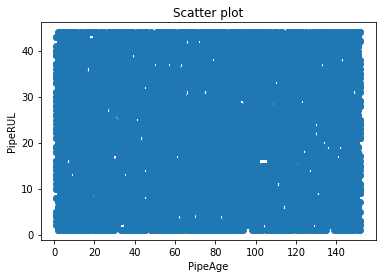

In [10]:
plt.scatter(data['PipeAge'], data['PipeRUL'])
plt.title('Scatter plot')
plt.xlabel('PipeAge')
plt.ylabel('PipeRUL')
plt.show()

In [11]:
X_data = data.iloc[ :,0:12]



In [12]:
X_data.columns

Index(['PipeAge', 'PipeDiameter', 'PipeLength', 'PipeBreakage', 'PipeWallLos',
       'ExpectedPipeAge', 'Material_CI', 'Material_Concrete',
       'Material_Ductile Iron', 'Material_PVC', 'Material_Polyethene',
       'Material_Steel'],
      dtype='object')

In [13]:
Y_data = data.iloc[ :,12]

In [14]:
print(Y_data)

0       43
1       24
2       15
3       23
4        2
        ..
9995    34
9996    38
9997    13
9998    20
9999     1
Name: PipeRUL, Length: 10000, dtype: int64


In [52]:
X_train, X_test, y_train, y_test = train_test_split(X_data, Y_data, test_size = 0.5,
                                                   random_state = 0)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(5000, 12)
(5000, 12)
(5000,)
(5000,)


In [53]:
import sklearn.tree as tree
regressor = tree.DecisionTreeRegressor( random_state=0, max_depth = 3)

In [54]:
regressor.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=3, random_state=0)

In [55]:
a = regressor.fit(X_train, y_train)

In [56]:
a.predict(X_train)[0:5]

array([22.14304993, 22.07528011, 23.91489362, 22.07528011, 22.07528011])

In [57]:
a.predict(X_train)

array([22.14304993, 22.07528011, 23.91489362, ..., 22.07528011,
       22.07528011, 23.8869258 ])

In [58]:
regressor.score(X_test,y_test)

-0.01410189220636826

In [59]:
regressor.feature_importances_


array([0.18589367, 0.15513411, 0.3500586 , 0.16662292, 0.        ,
       0.14229071, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        ])

In [60]:
X_data.columns

Index(['PipeAge', 'PipeDiameter', 'PipeLength', 'PipeBreakage', 'PipeWallLos',
       'ExpectedPipeAge', 'Material_CI', 'Material_Concrete',
       'Material_Ductile Iron', 'Material_PVC', 'Material_Polyethene',
       'Material_Steel'],
      dtype='object')

In [61]:
pd.Series(regressor.feature_importances_,index=X_data.columns).sort_values(ascending=False).head(5)

PipeLength         0.350059
PipeAge            0.185894
PipeBreakage       0.166623
PipeDiameter       0.155134
ExpectedPipeAge    0.142291
dtype: float64

In [62]:
import pydotplus
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files/Graphviz/bin/'

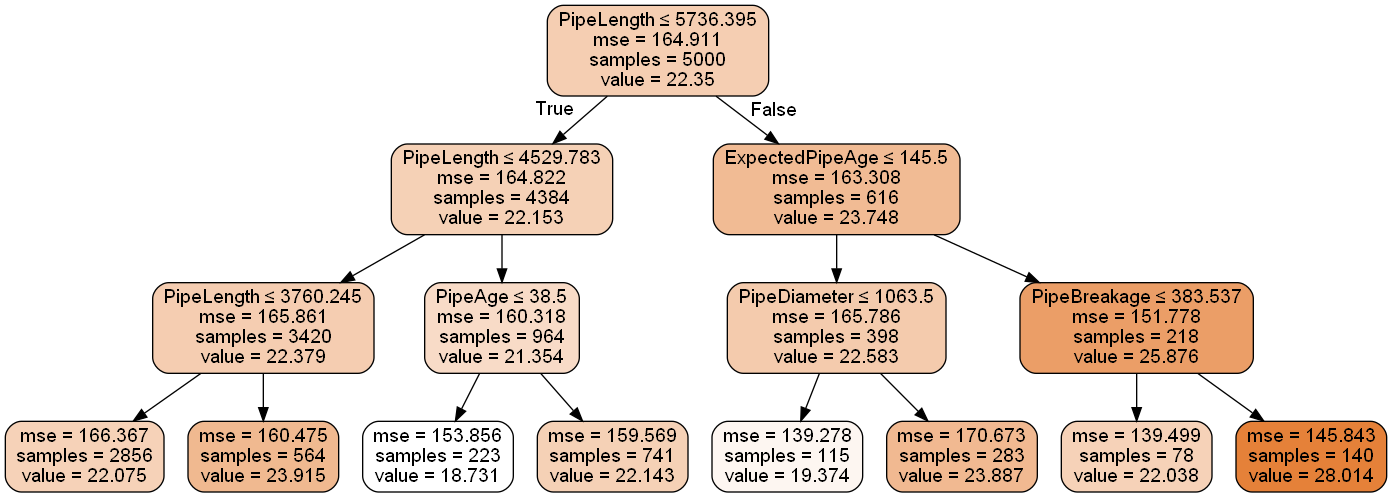

In [63]:
dot_data = tree.export_graphviz(regressor, out_file=None, 
                         feature_names=X_data.columns,  
                         filled=True, rounded=True,  
                         special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data) 


# In[25]:


from IPython.display import Image


# In[26]:


Image(graph.create_png())

In [64]:
y_pred = regressor.predict(X_test)

In [65]:
df=pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})

In [66]:
df

,Actual,Predicted
9394,22,22.075280
898,39,22.143050
2398,28,22.143050
5906,13,22.143050
2343,14,22.143050
...,...,...
3996,1,22.143050
5889,23,22.143050
4577,24,22.143050
8600,22,22.075280


In [67]:
from sklearn import metrics
import numpy as np

In [68]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 11.004489273936489
Mean Squared Error: 162.86395159272706
Root Mean Squared Error: 12.761816155732971
